In [139]:
import pandas as pd
import numpy as np

In [140]:
df = pd.read_csv("intern_task.csv")

# Data Analysis

In [141]:
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


In [142]:
df.shape

(235258, 146)

In [143]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [144]:
df.isna().sum().sum()

0

No categorical features, no missing data, that is good.

<Axes: >

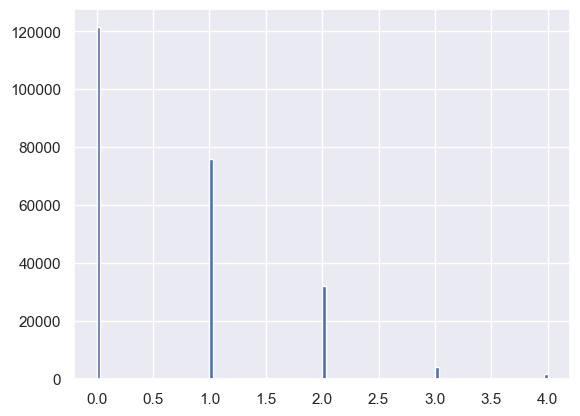

In [145]:
df['rank'].hist(bins='auto')

In [146]:
df.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


Now we see that features aren't normalized and their magnitudes are way different.

In [147]:
df[df.query_id == 10]

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
88,0,10,2.0,0.0,0.0,0.0,2.0,0.666667,0.0,0.000000,...,0.0,0.000000,0.000000,0.427823,0.000000,0.000000,0.004297,0.000025,7.0,2.333333
89,1,10,2.0,0.0,2.0,1.0,2.0,0.666667,0.0,0.666667,...,0.0,0.000000,0.166667,0.907969,13.545122,0.333333,0.019259,0.000180,10.0,3.333333
90,1,10,3.0,3.0,3.0,1.0,3.0,1.000000,1.0,1.000000,...,1.0,1.800000,0.125000,0.989621,18.240926,0.333333,0.007376,0.000001,14.0,4.666667


So it turns out that multiple queries in the same group may have the same rank.

In [148]:
corr = df.corr()
sorted_corrs = corr['rank'].sort_values(ascending=False)

highest_pos_corr = sorted_corrs.head(11) # rank + 10 others
highest_neg_corr = sorted_corrs.tail(10).dropna()
highest_idxes = np.concatenate([highest_pos_corr.index, highest_neg_corr.index])

<Axes: >

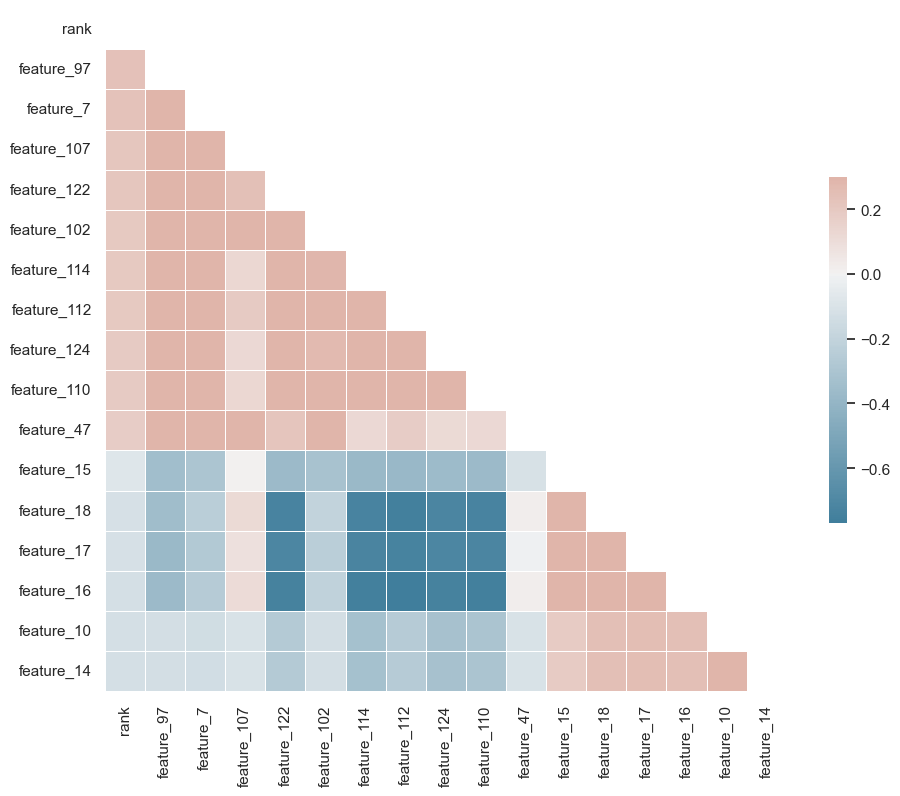

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = df[highest_idxes].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Корреляции выше 0.25 с рангом не наблюдается, однако существует заметная антикорреляция между собой у других признаков.

# Data Preprocessing

In [150]:
groups = df['query_id']
y = df['rank']
X = df.drop(columns=['query_id', 'rank'])
X['group'] = groups

In [151]:
max_relevance = np.max(y)
y /= max_relevance

In [152]:
X.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,group
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,500.000000,0.834909,...,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379,14828.413401
std,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,288.676975,0.310762,...,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378,8193.945170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,250.000000,0.750000,...,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000,8215.000000
50%,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,500.000000,1.000000,...,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000,14935.000000
75%,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,750.000000,1.000000,...,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000,21580.000000
max,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,1000.000000,1.000000,...,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000,29995.000000


Group split to assure that all queries from the same group go to the same set.

In [153]:
from sklearn.model_selection import GroupShuffleSplit

gs_1 = GroupShuffleSplit(n_splits=1, train_size=.85, random_state=42)
train_test_ix, val_ix = next(gs_1.split(X, y, groups=X.group))
X_train_test = X.loc[train_test_ix]
X_val = X.loc[val_ix]
y_train_test = y.loc[train_test_ix]
y_val = y.loc[val_ix]

In [154]:
X_train_test = X_train_test.reset_index(drop=True)
y_train_test = y_train_test.reset_index(drop=True)
gs_2 = GroupShuffleSplit(n_splits=1, train_size=.85, random_state=42)
train_ix, test_ix = next(gs_2.split(X_train_test, y_train_test, groups=X_train_test.group))
X_train = X_train_test.loc[train_ix]
X_test = X_train_test.loc[test_ix]
y_train = y.loc[train_ix]
y_test = y.loc[test_ix]

Making sure that groups indeed do not intersect

In [155]:
inter_train_val = list(set(X_train.group.unique()).intersection(X_val.group.unique()))
inter_val_test = list(set(X_val.group.unique()).intersection(X_test.group.unique()))
inter_train_test = list(set(X_train.group.unique()).intersection(X_test.group.unique()))

assert len(inter_train_val) == 0, "Train and val groups intersect"
assert len(inter_val_test) == 0, "Test and val groups intersect"
assert len(inter_train_test) == 0,  "Train and test groups intersect"

In [156]:
train_groups = X_train.group
val_groups = X_val.group
test_groups = X_test.group
X_train = X_train.drop(columns=['group'])
X_val= X_val.drop(columns=['group'])
X_test = X_test.drop(columns=['group'])

# Model training

In [157]:
from catboost import CatBoostRanker, Pool

train_pool = Pool(
    data=X_train,
    label=y_train,
    group_id=train_groups
)

val_pool = Pool(
    data=X_val,
    label=y_val,
    group_id=val_groups
)

test_pool = Pool(
    data=X_test,
    label=y_test,
    group_id=test_groups
)

In [158]:
from copy import deepcopy

default_parameters = {
    'iterations': 300,
    'verbose': 100,
    'random_seed': 42,
    'early_stopping_rounds': 100,
    "l2_leaf_reg": 8.386808735137683,
    "use_best_model":True,
    "random_strength":3,
    "max_depth": 6,
    'custom_metric': ['NDCG:top=5', 'MAP:top=5', 'NDCG'],
    'loss_function': 'YetiRank',
}


parameters = deepcopy(default_parameters)
parameters['train_dir'] = parameters['loss_function']


In [159]:
# import optuna
# 
# def objective(trial):
# 
#     param = {
#         "iterations": 500,
#         'early_stopping_rounds': 300,
#         'max_depth': trial.suggest_int("max_depth", 5, 10),
#         'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 0.5, 10, log=True)
#     }
#     cp = default_parameters.copy()
#     cp.update(param)
#     model = CatBoostRanker(**cp)
# 
#     model.fit(train_pool, eval_set=val_pool, use_best_model=True, verbose=False)
#     
#     best_iter = model.best_iteration_
# 
#     ndcgs = model.evals_result_["validation"]['NDCG:top=5;type=Base']
# 
# 
#     return ndcgs[best_iter]

In [165]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)
# print('Best value:', study.best_trial.value)

Number of finished trials: 30
Best trial: {'max_depth': 6, 'l2_leaf_reg': 8.386808735137683}
Best value: 0.3729197234567575

In [160]:
best_params = deepcopy(default_parameters)
# best_params.update(study.best_trial.params)
model = CatBoostRanker(**best_params)

In [161]:
model.fit(train_pool, eval_set=val_pool, use_best_model=True)

0:	test: 0.2111821	best: 0.2111821 (0)	total: 223ms	remaining: 1m 6s
100:	test: 0.5753306	best: 0.5811084 (94)	total: 22.9s	remaining: 45.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5811084183
bestIteration = 94

Shrink model to first 95 iterations.


In [162]:
test_metrics = model.eval_metrics(test_pool, 
                             metrics=default_parameters['custom_metric'])

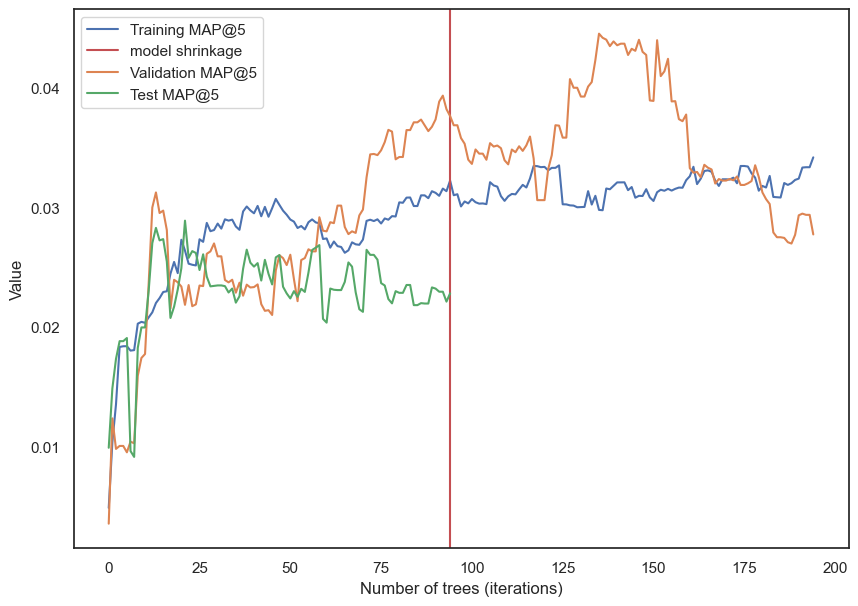

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(model.evals_result_["learn"]["MAP:top=5"], label="Training MAP@5")

plt.axvline(x = model.best_iteration_, color = 'r', label = 'model shrinkage')

plt.plot(model.evals_result_["validation"]['MAP:top=5'], label="Validation MAP@5")
plt.plot(test_metrics['MAP:top=5'], label="Test MAP@5")
plt.xlabel("Number of trees (iterations)")
plt.ylabel("Value")
plt.legend()

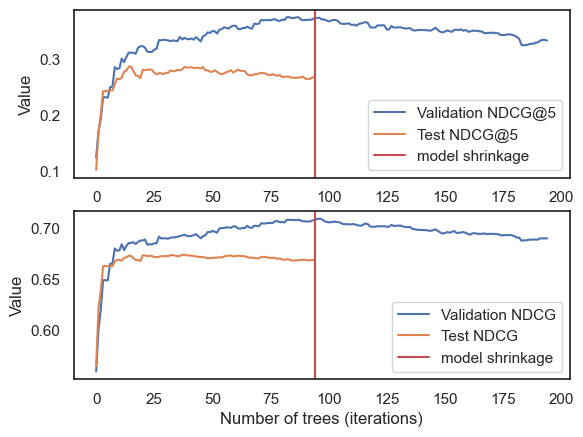

In [164]:
plt.subplot(211)
plt.plot(model.evals_result_["validation"]['NDCG:top=5;type=Base'], label="Validation NDCG@5")
plt.plot(test_metrics['NDCG:top=5;type=Base'], label="Test NDCG@5")
plt.axvline(x = model.best_iteration_, color = 'r', label = 'model shrinkage')
#plt.xlabel("Number of trees (iterations)")
plt.ylabel("Value")
plt.legend()

plt.subplot(212)
plt.plot(model.evals_result_["validation"]['NDCG:type=Base'], label="Validation NDCG")
plt.plot(test_metrics['NDCG:type=Base'], label="Test NDCG")
plt.axvline(x = model.best_iteration_, color = 'r', label = 'model shrinkage')
plt.xlabel("Number of trees (iterations)")
plt.ylabel("Value")
plt.legend()